# Women Rights and Democracy datasets

The focus of this section will be to run basic linear regressions to see if there is a relationship between the women rights levels in the countries and the democracy indexes.

To simplify the first analysis, we'll use only the total score from the Freedom in the World dataset.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smrp
import sklearn as sk

In [20]:
# Democracy
freedom_world_df = pd.read_csv('../datasets/processed/democracy/freedom-world/freedom-world-snapshot.csv', header=0)
# Women's Rights
georgetown_df = pd.read_csv('../datasets/processed/women/georgetown/women-peace-and-security-index.csv', header=0)
world_bank_df = pd.read_csv('../datasets/processed/women/world-bank/women-business-and-the-law-snapshot.csv', header=0)


Now I'll verify the columns on each dataset.



In [21]:
print(freedom_world_df.info())
print(georgetown_df.info())
print(world_bank_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iso3       195 non-null    object
 1   country    195 non-null    object
 2   status     195 non-null    object
 3   pr_rating  195 non-null    int64 
 4   cl_rating  195 non-null    int64 
 5   a1         195 non-null    int64 
 6   a2         195 non-null    int64 
 7   a3         195 non-null    int64 
 8   a          195 non-null    int64 
 9   b1         195 non-null    int64 
 10  b2         195 non-null    int64 
 11  b3         195 non-null    int64 
 12  b4         195 non-null    int64 
 13  b          195 non-null    int64 
 14  c1         195 non-null    int64 
 15  c2         195 non-null    int64 
 16  c3         195 non-null    int64 
 17  c          195 non-null    int64 
 18  pr         195 non-null    int64 
 19  d1         195 non-null    int64 
 20  d2         195 non-null    int64

## Merge Datasets

Now I'll merge all the datasets in one using the "iso3" column as the key.

In [22]:
# Merge all the datasets and lose the countries that are missing in any of them.
merged_df = freedom_world_df.merge(georgetown_df, on='iso3', how='inner', suffixes=('_f', '_g'))
merged_df = merged_df.merge(world_bank_df, on='iso3', how='inner', suffixes=('', '_w'))

print(f"Countries in Freedom world: {len(freedom_world_df)}")
print(f"Countries in Georgetown: {len(georgetown_df)}")
print(f"Countries in World Bank: {len(world_bank_df)}")
print(f"Countries in all the datasets: {len(merged_df)}")



Countries in Freedom world: 195
Countries in Georgetown: 177
Countries in World Bank: 190
Countries in all the datasets: 173


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 107 entries, iso3 to pension_credit_childcare
dtypes: bool(35), float64(15), int64(51), object(6)
memory usage: 103.4+ KB


In [24]:
merged_df.head()

,iso3,country_f,status,pr_rating,cl_rating,a1,a2,a3,a,b1,...,equal_property_rights,equal_inheritance_children,equal_inheritance_spouses,equal_asset_admin_marriage,value_nonmonetary_contributions,pension,equal_pension_age_full,equal_pension_age_partial,equal_retirement_age,pension_credit_childcare
0,AFG,Afghanistan,NF,7,7,0,0,0,0,0,...,True,False,False,True,False,25,False,False,True,False
1,ALB,Albania,PF,3,3,3,3,3,9,3,...,True,True,True,True,True,50,False,False,True,True
2,DZA,Algeria,NF,6,5,1,1,1,3,1,...,True,False,False,True,False,25,False,False,False,True
3,AGO,Angola,NF,6,5,0,2,1,3,1,...,True,True,True,True,True,25,False,True,False,False
4,ARG,Argentina,F,2,2,4,4,3,11,4,...,True,True,True,True,True,75,False,True,True,True


## Linear Regression


From the "Freedom in the World" dataset, I want to predict the "total" score using the Women Rights indicators.

The Georgetown dataset provides an overall score under the column "women_peace_and_security_index" and a series of indicators used to calculate it: education, employment, financial_inclusion, etc.

The World Bank dataset calculates a global score under "wbl_index". The data points that lead to the final score are grouped in categories: mobility, workplace, pay, marriage, etc. I'm using only the global values of those categories for this analysis.

In [25]:
linear_regression_df = merged_df.copy()

predictors = ["women_peace_and_security_index","education","employment","financial_inclusion","cell_phone_use","parliamentary_representation","absence_of_legal_discrimination","access_to_justice","maternal_mortality_ratio","son_bias","intimate_partner_violence_","community_safety","political_violence_targeting_women","proximity_to_conflict","wbl_index","mobility","workplace","pay","marriage","parenthood","entrepreneurship","assets","pension"]

y = linear_regression_df['total']
X = linear_regression_df[predictors]

scaler = sk.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
# Recover the original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X = sm.add_constant(X_scaled)

regresssion = sm.OLS(y, X_scaled)
results_reg = regresssion.fit()

print(results_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  total   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              1.466
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                      0.0940
Time:                        12:24:39   Log-Likelihood:                         -946.08
No. Observations:                 173   AIC:                                      1936.
Df Residuals:                     151   BIC:                                      2006.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

The most significant value by far is the predictor **access_to_justice**, from the Georgetown Women Peace and Security Index, with a p-value of 0.028.

The "women_peace_and_security_index" is also significant, with a p-value of 0.430, and a possibility of a null hypothesis, but a high coefficient over the standardized dataset.

Overall, except for the "access_to_justice" predictor, the correlation isn't good. Between the Georgetown and the World Bank datasets, only the Georgetown dataset has a somewhat significant correlation.

## LASSO

Now I'll run a LASSO regression to see if we can select the most important predictors easily. Statsmodels doesn't support LASSO so I'll use scikit-learn.

In [26]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_scaled, y, test_size=0.2, random_state=0)


lasso = sk.linear_model.Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("Lasso Regression (L1)")
print("R2 score:", sk.metrics.r2_score(y_test, y_pred))

coef_df = pd.DataFrame({
    'Predictor': X_scaled.columns,
    'Coefficient': lasso.coef_
})

print(coef_df)

Lasso Regression (L1)
R2 score: 0.6745557745505348
                             Predictor  Coefficient
0       women_peace_and_security_index     0.000000
1                            education     1.917648
2                           employment    -0.000000
3                  financial_inclusion     1.413152
4                       cell_phone_use    -0.000000
5         parliamentary_representation     0.000000
6      absence_of_legal_discrimination     0.413622
7                    access_to_justice    17.649331
8             maternal_mortality_ratio    -2.101790
9                             son_bias    -0.000000
10          intimate_partner_violence_    -0.000000
11                    community_safety    -1.542367
12  political_violence_targeting_women     0.403621
13               proximity_to_conflict    -0.526509
14                           wbl_index     0.000000
15                            mobility     0.000000
16                           workplace     0.000000
17           

This confirms the results. The predictor "access_to_justice" is very important. The "Women Peace and Security Index" is discarded by the LASSO model.

Just in case, I'll run this again but take out the "access_to_justice" predictor.

In [27]:
# Take "access_to_justice" out of the predictors
X_scaled_no_justice = X_scaled.drop(columns=["access_to_justice"])
X_train_no_justice, X_test_no_justice, y_train_no_justice, y_test_no_justice = sk.model_selection.train_test_split(X_scaled_no_justice, y, test_size=0.2, random_state=0)


lasso = sk.linear_model.Lasso(alpha=1.0)
lasso.fit(X_train_no_justice, y_train_no_justice)
y_pred_no_justice = lasso.predict(X_test_no_justice)

print("Lasso Regression (L1)")
print("R2 score:", sk.metrics.r2_score(y_test_no_justice, y_pred_no_justice))

coef_df = pd.DataFrame({
    'Predictor': X_scaled_no_justice.columns,
    'Coefficient': lasso.coef_
})

print(coef_df)

Lasso Regression (L1)
R2 score: 0.5439345585361612
                             Predictor  Coefficient
0       women_peace_and_security_index    13.371921
1                            education     0.000000
2                           employment    -0.000000
3                  financial_inclusion     3.564023
4                       cell_phone_use    -0.000000
5         parliamentary_representation    -0.076218
6      absence_of_legal_discrimination     0.000000
7             maternal_mortality_ratio    -0.892238
8                             son_bias    -0.000000
9           intimate_partner_violence_    -0.000000
10                    community_safety    -4.069980
11  political_violence_targeting_women     0.000000
12               proximity_to_conflict    -0.000000
13                           wbl_index     0.000000
14                            mobility    -0.000000
15                           workplace     0.751782
16                                 pay     0.000000
17           

Here the R2 score goes down to 0.54, which doesn't make this model very good, but now the "women_peace_and_security_index" is the main predictor. This tell us we shouldn't ignore it.

## Scatter Plots

I'll create a series of scatter plots.

The freedom in the world dataset has a status column that tells us if the country is "Free", "Partly Free" or "Not Free".

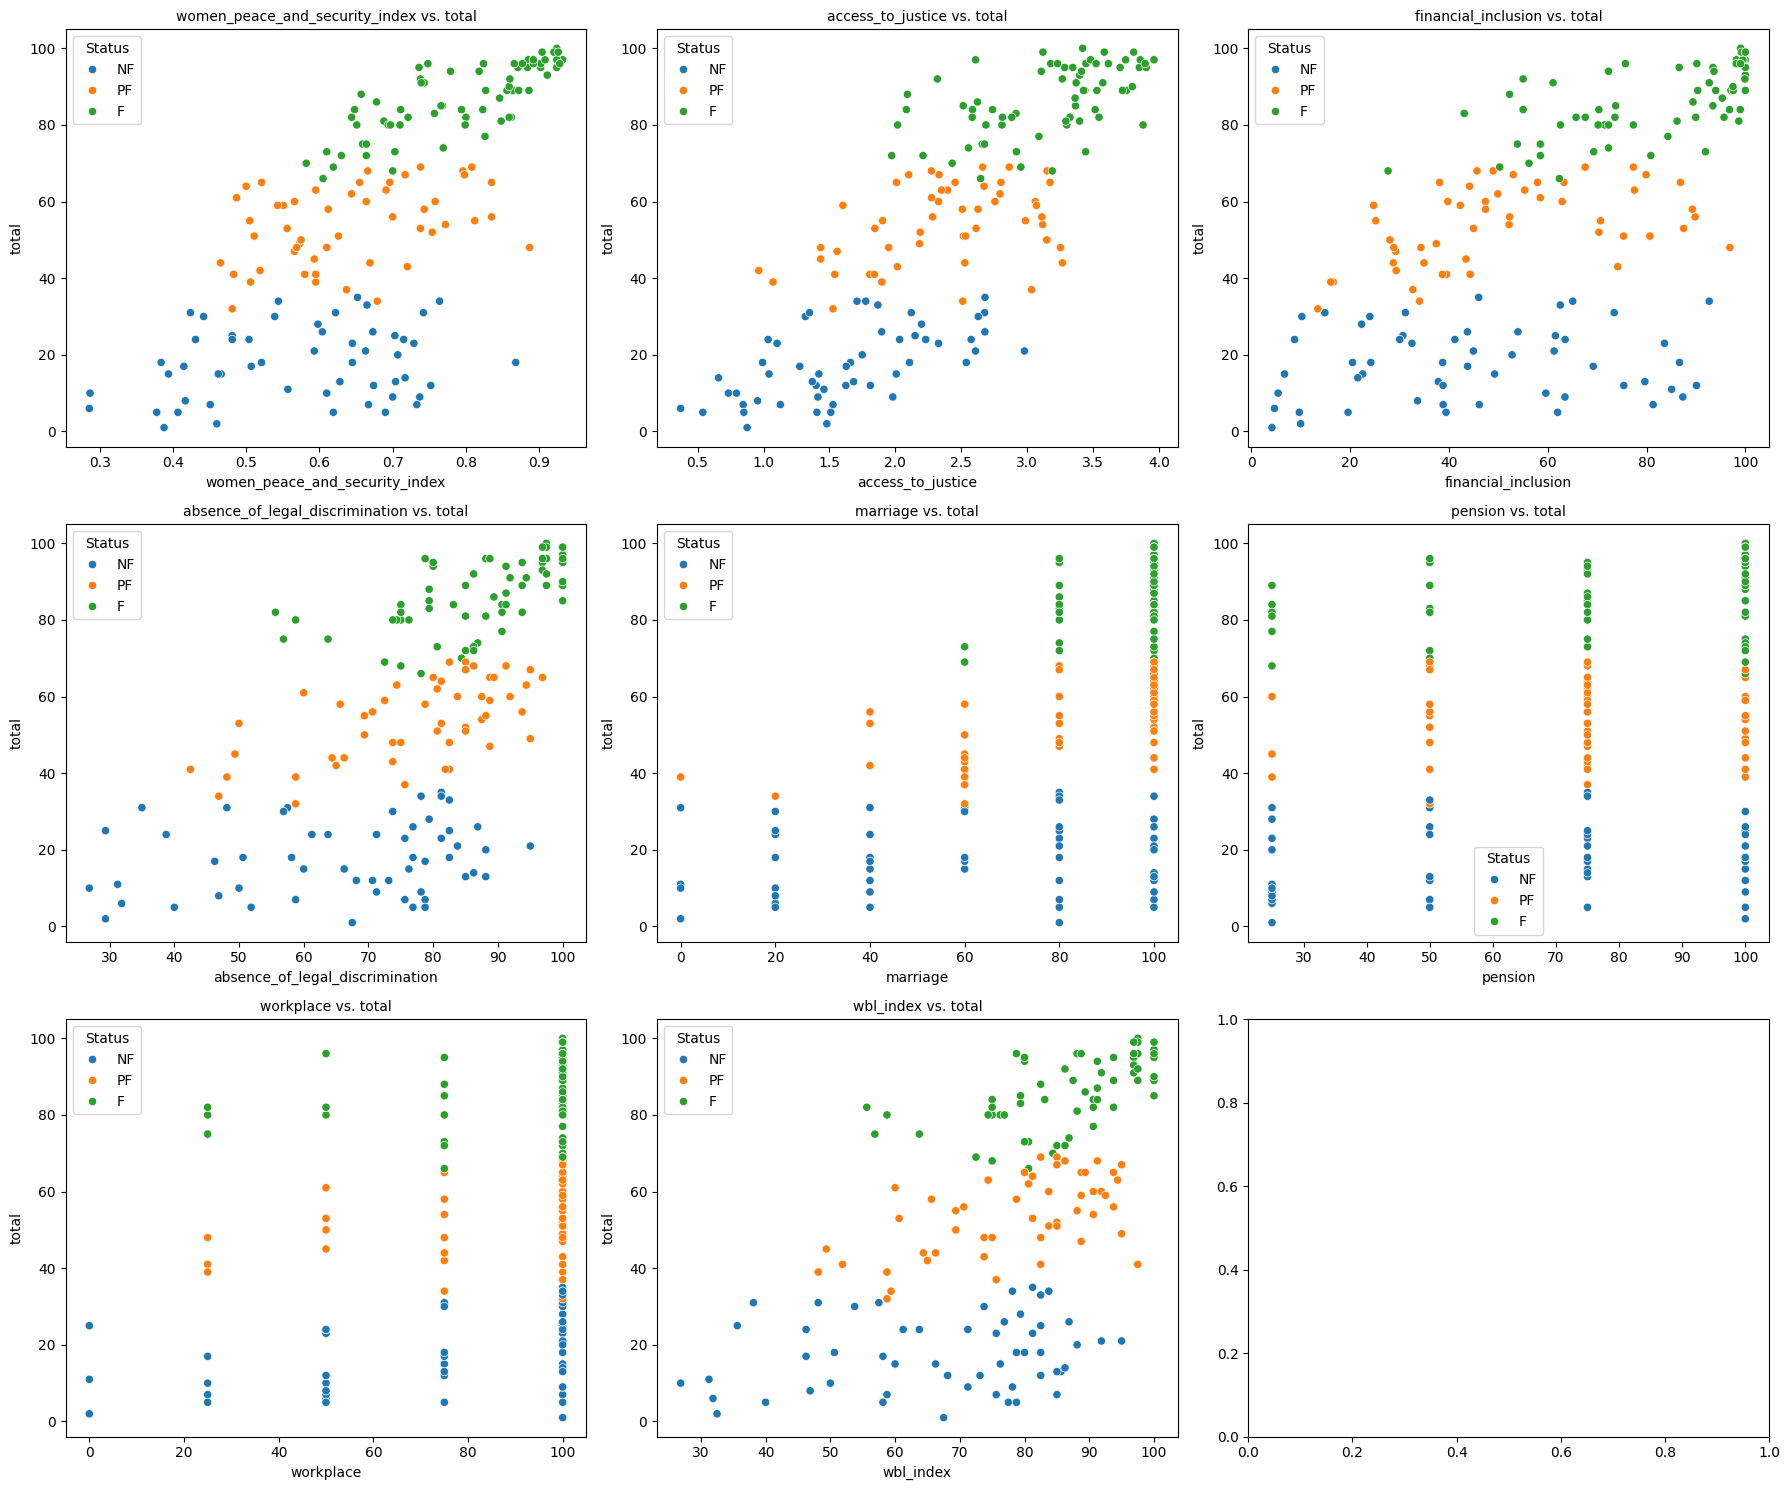

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

scatter_plot_combinations = [
    ("women_peace_and_security_index", "total"),
    ("access_to_justice", "total"),
    ("financial_inclusion", "total"),
    ("absence_of_legal_discrimination", "total"),
    ("marriage", "total"),
    ("pension", "total"),
    ("workplace", "total"),
    ("wbl_index", "total"),
    
]

for ax, (predictor_x, predictor_y) in zip(axes.flat, scatter_plot_combinations):
    sns.scatterplot(
        x=merged_df[predictor_x],
        y=merged_df[predictor_y],
        hue=merged_df["status"],
        ax=ax
    )
    ax.set_xlabel(predictor_x, size=10)
    ax.set_ylabel(predictor_y, size=10)
    ax.set_title(f"{predictor_x} vs. {predictor_y}", size=10)
    ax.legend(title="Status", loc="best")

plt.tight_layout()
plt.show()

Based on the scatter plots we arrive to the same conclusion. The "access_to_justice" shows a very strong correlation with the total freedom score. The Georgetown Women Peace and Security Index is also a good predictor. The other predictors, specially the World Bank ones, show a very weak correlation with the total score.

## Residual Plot

Now I'll create a linear regression of **total** vs **access_to_justice** and **women_peace_and_security_index**, and the draw a residual plot.

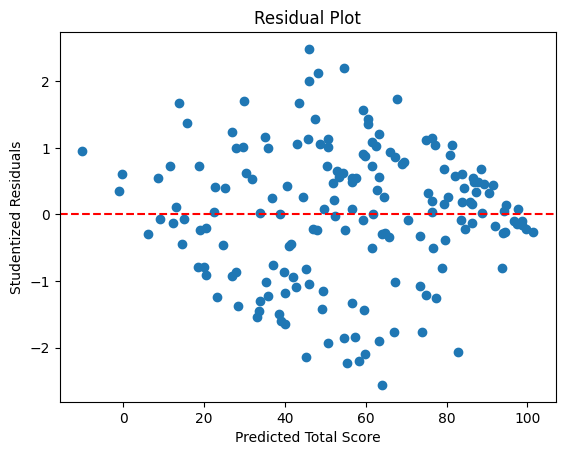

In [ ]:
X = merged_df[["women_peace_and_security_index","access_to_justice"]]
y = merged_df["total"]

X = sm.add_constant(X)



regression = smf.ols(formula='total ~ women_peace_and_security_index + access_to_justice', data=merged_df).fit()

y_hat = regression.fittedvalues
residuals = regression.resid
studentized_residuals = regression.get_influence().resid_studentized_external

plt.scatter(y_hat, studentized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Total Score")
plt.ylabel("Studentized Residuals")
plt.title("Residual Plot")
plt.show()

The highest studentized residuals have a value of 2 or 2.5. This means there aren't severe outliers.

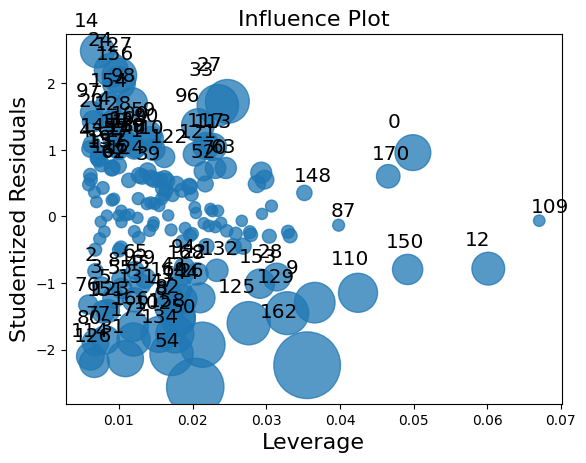

In [48]:
smrp.influence_plot(regression, external=True, alpha=0.5, criterion='cooks', size=48, plot_alpha=0.75)
plt.show()

This shows the same results. There aren't severe outliers. Points with high leverage as the entry #109 and #12 have almost zero residual.

In [53]:
influence = regression.get_influence()
cooks_d, p_values = influence.cooks_distance

merged_with_cooks = merged_df.copy()
merged_with_cooks['cooks_distance'] = cooks_d
top_influential = merged_with_cooks.sort_values('cooks_distance', ascending=False)
print(top_influential[["iso3",'country', 'cooks_distance']].head(20))

    iso3               country  cooks_distance
162  ARE  United Arab Emirates        0.059984
54   GAB                 Gabon        0.043989
50   ETH              Ethiopia        0.026563
27   CAN                Canada        0.024908
134  SGP             Singapore        0.024315
125  RUS    Russian Federation        0.024135
129  SAU          Saudi Arabia        0.023769
33   COM               Comoros        0.022064
9    BHR               Bahrain        0.021160
110  NER                 Niger        0.019425
158  TUN               Tunisia        0.018374
31   CHN                 China        0.016375
102  MAR               Morocco        0.016231
0    AFG           Afghanistan        0.016074
127  WSM                 Samoa        0.014854
8    AZE            Azerbaijan        0.014458
14   BLZ                Belize        0.014226
24   CPV            Cabo Verde        0.014213
82   LAO               Lao PDR        0.013659
172  ZWE              Zimbabwe        0.013616


The maximum Cook's distance is 0.059, which is way below the threshold of 1 usually adopted to identify outliers.